<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/LandUse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load  and Plot the ShapeFile



```
Bangai_2ka.shp
Bangai_2kha.shp
Bangai_4
Bangai_6kha
Bangai_7

Barkalpur_2chha
Barkalpur_2gha
Barkalpur_2ja
Barkalpur_6kha


Buddhi_1ka


Dhankauli_9ta
Dhankauli_9nga



Hariharpur_5kha.shp


Mahendrakot_1kha

Mahuwa_1ka.shp
Mahuwa_2kha.shp
Mahuwa_4ka.shp
Mahuwa_4kha.shp
Mahuwa_6.shp
Mahuwa_9ka.shp
Mahuwa_9kha.shp
```



/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D Polygon' is converted to 'Polygon Z'
  return ogr_read(
<ipython-input-275-3a363b925aef>:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-275-3a363b925aef>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


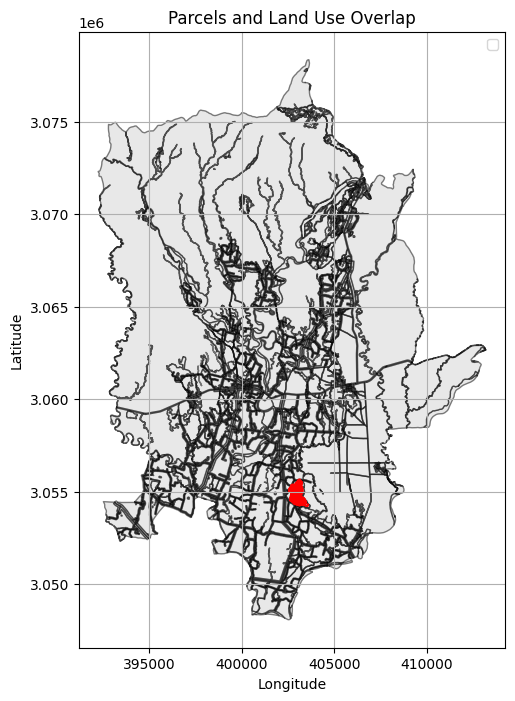

In [275]:
import geopandas as gpd
import matplotlib.pyplot as plt



base_name = "Mahuwa_9kha.shp"

# Load parcel shapefile
parcels = gpd.read_file("/content/drive/MyDrive/LandUse/New folder/Mahuwa_9kha.shp")

# Load land use shapefile
landuse = gpd.read_file("/content/drive/MyDrive/LandUse/Bakadariya/BuddhaBhumiLanduse.shp")

# Plot both layers
fig, ax = plt.subplots(figsize=(10, 8))
landuse.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5, label="Land Use")
parcels.plot(ax=ax, color="none", edgecolor="red", linewidth=1, label="Parcels")

plt.legend()
plt.title("Parcels and Land Use Overlap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# Perform intersection to split parcels based on land use


In [276]:

split_parcels = gpd.overlay(parcels, landuse, how="intersection")

# Add classified land use
split_parcels["Classified_Zone"] = split_parcels["name"]  # Using 'name' from landuse

<ipython-input-276-dc2f3a967e88>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: ESRI:102306

  split_parcels = gpd.overlay(parcels, landuse, how="intersection")


# Check if a parcel is split by land use (appears multiple times)


In [277]:
split_status = split_parcels.groupby("PARCELKEY")["Classified_Zone"].nunique()
split_status = split_status.apply(lambda x: "Split" if x > 1 else "Not Split")

# Add Split_Status column
split_parcels["Split_Status"] = split_parcels["PARCELKEY"].map(split_status)

# Save to new shapefile


In [278]:
import os

# Define the folder path
classified_folder = "/content/Mahendrakot"

# Ensure the folder exists
os.makedirs(classified_folder, exist_ok=True)



# Construct the filename dynamically
shapefile_name = f"split_{base_name}.shp"




# Define the full file path
shapefile_path = os.path.join(classified_folder, shapefile_name)

# Save the shapefile
split_parcels.to_file(shapefile_path)

print(f"Shapefile saved at: {shapefile_path}")


Shapefile saved at: /content/Mahendrakot/split_Mahuwa_9kha.shp.shp


<ipython-input-278-f9b4feeaa546>:21: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  split_parcels.to_file(shapefile_path)
/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'objectid' to 'objectid_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'shape_leng' to 'shape_le_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'shape_area' to 'shape_ar_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Classified_Zone' to 'Classified'
  ogr_write(

<ipython-input-279-44e35f430aa6>:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-279-44e35f430aa6>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


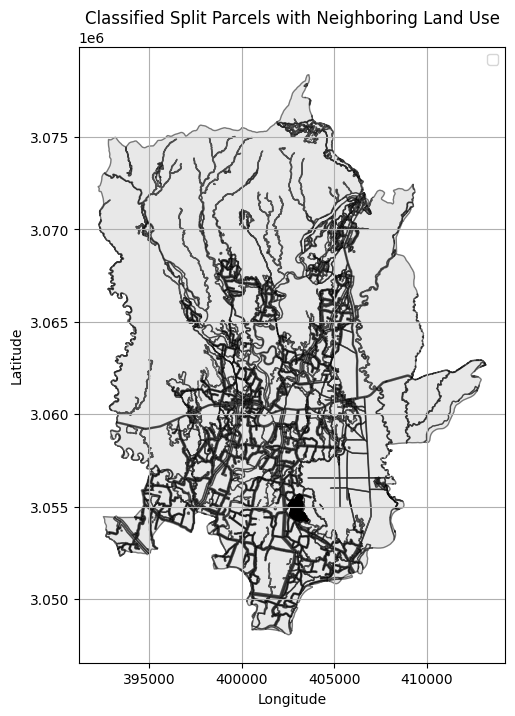

In [279]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot original land use
landuse.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5, label="Land Use")

# Plot split parcels with color based on land use
split_parcels.plot(column="Classified_Zone", ax=ax, legend=True, cmap="Set1", edgecolor="black")

plt.title("Classified Split Parcels with Neighboring Land Use")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-280-9dbbbc4d6280>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


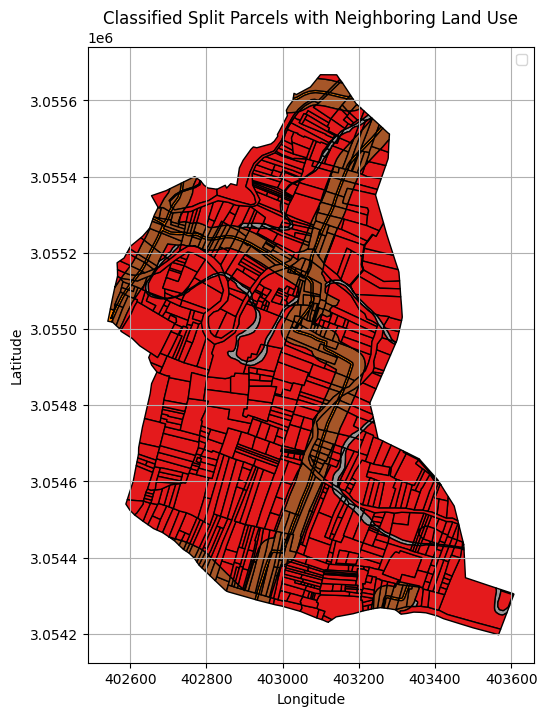

In [280]:
fig, ax = plt.subplots(figsize=(12, 8))


# Plot split parcels with color based on land use
split_parcels.plot(column="Classified_Zone", ax=ax, legend=True, cmap="Set1", edgecolor="black")

plt.title("Classified Split Parcels with Neighboring Land Use")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

In [281]:
import geopandas as gpd

# Ensure both dataframes have the same CRS
parcels = parcels.to_crs(epsg=4326)
split_parcels = split_parcels.to_crs(epsg=4326)

# Perform spatial join using "PARCELNO"
split_parcels = gpd.sjoin(split_parcels, parcels[['PARCELNO', 'geometry']], how="left", predicate="within")

# Rename the joined column for clarity
split_parcels.rename(columns={"PARCELNO": "parent_parcelno"}, inplace=True)

# Drop unnecessary spatial join index
split_parcels.drop(columns=["index_right"], inplace=True, errors="ignore")

# Print the columns to verify the join
print(split_parcels.columns)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [ ]:
print(split_parcels.head())

# 5️⃣ **Plot the Final Split Parcels**

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))
landuse.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5, label="Land Use")
split_parcels.plot(ax=ax, color="yellow", edgecolor="red", linewidth=1, label="Split Parcels")
plt.legend()
plt.title("Classified Split Parcels with Neighbors")
plt.show()

In [ ]:
print("Parcels Columns:", parcels.columns)
print("Split Parcels Columns:", split_parcels.columns)

# Function to determine the direction of the split parcel (only 4 directions)

In [ ]:

import geopandas as gpd


def get_split_direction(original_parcel, split_parcel, split_status):
    if split_status == "Not Split":
        return "Not Classified"

    orig_centroid = original_parcel.centroid
    split_centroid = split_parcel.centroid

    dx = split_centroid.x - orig_centroid.x
    dy = split_centroid.y - orig_centroid.y

    # Classify into 4 primary directions
    if abs(dx) > abs(dy):  # Horizontal movement is dominant
        return "East" if dx > 0 else "West"
    else:  # Vertical movement is dominant
        return "North" if dy > 0 else "South"

# # Load the shapefiles
# parcels = gpd.read_file("parcels.shp")
# split_parcels = gpd.read_file("split_parcels.shp")


# Create a dictionary of original parcels for faster lookup
original_parcel_dict = parcels.set_index("PARCELNO")["geometry"].to_dict()

# Assign direction to split parcels
split_parcels["Direction"] = split_parcels.apply(
    lambda row: get_split_direction(
        original_parcel_dict.get(row["PARCELNO_left"], row["geometry"]),
        row["geometry"],
        row["Split_Status"]
    ),
    axis=1
)

# # Save the updated shapefile
# split_parcels.to_file("split_parcels_with_4directions.shp")
# print("Updated shapefile saved as 'split_parcels_with_4directions.shp'")

In [ ]:
import os

# Define the folder path
direction_folder = "/content/direction_Mahuwa"

# Ensure the folder exists
os.makedirs(direction_folder, exist_ok=True)
# Define the base name dynamically


# Construct the filename dynamically
shapefile_name = f"{base_name}_with_4directions.shp"

# Define the full file path
shapefile_path = os.path.join(direction_folder, shapefile_name)

# Save the shapefile
split_parcels.to_file(shapefile_path)

print(f"Updated shapefile saved at: {shapefile_path}")


In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import os

# # # Load the updated shapefile with direction classification
# # split_parcels = gpd.read_file("split_parcels_with_4directions.shp")
# # parcels = gpd.read_file("parcels.shp")

# # Ensure the coordinate reference system (CRS) matches
# split_parcels = split_parcels.to_crs(parcels.crs)

# # Create a folder to save images
# output_folder = "images"
# os.makedirs(output_folder, exist_ok=True)

# # Filter only parcels that have been split
# split_parcels_filtered = split_parcels[split_parcels["Split_Status"] != "Not Split"]

# # Iterate through only split parcels and save images
# for index, row in split_parcels_filtered.iterrows():
#     parcel_no = row["PARCELNO_left"]  # Use original parcel number for naming
#     direction = row["Direction"]

#     # Get the original parcel geometry
#     original_parcel = parcels[parcels["PARCELNO"] == parcel_no]

#     # Create a plot
#     fig, ax = plt.subplots(figsize=(6, 6))

#     # Plot original parcel
#     if not original_parcel.empty:
#         original_parcel.plot(ax=ax, color="none", edgecolor="black", linewidth=1, label="Original Parcel")

#     # Plot split parcel
#     gpd.GeoSeries(row["geometry"]).plot(ax=ax, color="lightblue", edgecolor="blue", linewidth=1.5, label="Split Parcel")

#     # Add direction label
#     centroid = row["geometry"].centroid
#     ax.text(centroid.x, centroid.y, direction, fontsize=12, fontweight="bold", ha="center", color="red")

#     # Zoom into the parcel by setting limits slightly larger than its bounds
#     bounds = row["geometry"].bounds  # (minx, miny, maxx, maxy)
#     padding = 0.0001  # Adjust padding for better visualization
#     ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
#     ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

#     # Formatting
#     ax.set_title(f"Parcel {parcel_no} - {direction}", fontsize=14)
#     ax.axis("off")

#     # Save as PNG inside the images folder
#     image_filename = os.path.join(output_folder, f"{parcel_no}.png")
#     plt.savefig(image_filename, bbox_inches="tight", dpi=300)
#     plt.close()

#     print(f"✅ Saved: {image_filename}")

# print("🎉 All split parcel images saved successfully in 'images/' folder!")


In [ ]:
# !zip -r images.zip images


In [ ]:
# from google.colab import files
# files.download("images.zip")


In [ ]:
# !zip -r direction_Hariharpur.zip direction_Hariharpur


In [ ]:
# from google.colab import files
# files.download("direction_Hariharpur.zip")


In [ ]:
# !zip -r Hariharpur.zip Hariharpur


In [ ]:
# from google.colab import files
# files.download("Hariharpur.zip")

In [ ]:
# import geopandas as gpd

# # # Load the shapefile
# # split_parcels = gpd.read_file("split_parcels_with_4directions.shp")

# # Ensure the CRS is projected (change 'EPSG:32644' to your local UTM zone)
# split_parcels = split_parcels.to_crs(epsg=32644)

# # Calculate the new area
# split_parcels["Calculated_Area"] = split_parcels.geometry.area  # Area in square meters

# # Identify split and non-split parcels
# split_status = split_parcels["Split_Stat"]

# # Ensure non-split parcels retain original area
# split_parcels.loc[split_status == "Not Split", "New_Area"] = split_parcels["Shape_Area"]

# # For split parcels, ensure sum of new areas equals original parcel area
# split_parcels["New_Area"] = split_parcels.groupby("PARCELNO_l")["Calculated_Area"].transform(lambda x: x / x.sum() * split_parcels["Shape_Area"])

# # Save the updated shapefile
# split_parcels.to_file("split_parcels_with_corrected_area.shp")

# # Save attributes (excluding geometry) to an Excel file
# split_parcels.drop(columns=["geometry"]).to_excel("split_parcels_with_new_area.xlsx", index=False)

# print("✅ New area calculated and saved in 'split_parcels_with_corrected_area.shp' and 'split_parcels_with_corrected_area.xlsx'.")


In [ ]:
# from google.colab import files
# files.download("split_parcels_with_new_area.xlsx")
